In [3]:
import numpy as np

def findMinWithRange(xdata,Idata,error):  

  minimum = np.argmin(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]<Idata[minimum]+error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

def findMaxWithRange(xdata,Idata,error):  

  minimum = np.argmax(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]+error>Idata[minimum]):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i

  minimumIndex = np.array([minimumsx,minimumdx])
  
  return minimumIndex

Brewster Angle Simulated = minimum parallel
56.34177390487406
Brewster Angle Simulated = maximum perpendicular
56.34177390487406
Refraction index simulated
1.5018076549319497
Brewster Angle Simulated from minimum mean
55.92831551282193
Brewster Angle Simulated from minimum error
0.5004742473666909
Refraction Index from minimum
1.4785672756950807
Refraction Index error from minimum
0.015591682205405237
Brewster Angle Simulated from maximum mean
55.92831551282193
Brewster Angle Simulated from maximum error
0.5004742473666909
Refraction Index from maximum
1.4785672756950807
Refraction Index error from maximum
0.015591682205405237
Index rifr from fit
[1.43581486]
[0.02280654]
Brewster Angle from fit
[55.14399919]
[0.42681408]


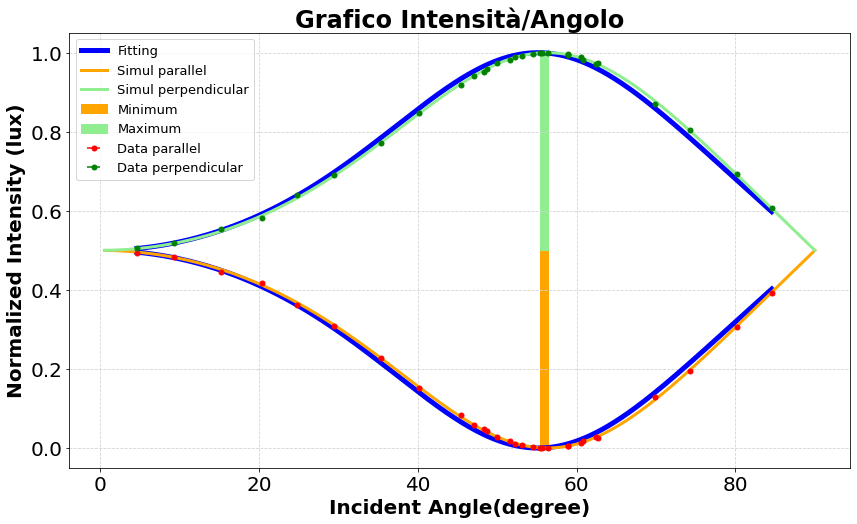

In [4]:
#SIMULATION

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#indice di rifrazione simulato
n = 1.5

#Brewster angle simulato
theta = 56

#I0 inventata
I0 = 1

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)

thetaisimulated = np.array([5,10,15,20,25,30,35,40,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,70,75,80,85])
thetaisimulated = thetaisimulated/180*np.pi

thetatsimulated = np.arcsin(np.sin(thetaisimulated)/n)

thetaisimulated = thetaisimulated+np.random.normal(0,0.5/180*np.pi,len(thetaisimulated))
thetatsimulated = thetatsimulated+np.random.normal(0,0.5/180*np.pi,len(thetaisimulated))

Idata = simulation(thetaisimulated,thetatsimulated)
Idata2 = simulationPerpendicular(thetaisimulated,thetatsimulated)
Idatatot = Idata+Idata2

Idatasimulated = np.copy(Idata)

Idata = Idata/Idatatot
Idata2 = Idata2/Idatatot


print('Brewster Angle Simulated = minimum parallel')
print(thetai[min]*360/2/np.pi)
print('Brewster Angle Simulated = maximum perpendicular')
print(thetai[max]*360/2/np.pi)
print('Refraction index simulated')
print(np.tan(thetai[min]))

#minimum, maximum analisys

minimum = findMinWithRange(thetaisimulated,Idata,0.0018)

maximum = findMaxWithRange(thetaisimulated,Idata2,0.0018)

print('Brewster Angle Simulated from minimum mean')
BrewsterDataAngle = (thetaisimulated[minimum[0]]+thetaisimulated[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated from minimum error')
BrewsterDataAngleErr = np.abs(thetaisimulated[minimum[0]]-thetaisimulated[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

print('Brewster Angle Simulated from maximum mean')
BrewsterDataAngle = (thetaisimulated[maximum[0]]+thetaisimulated[maximum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated from maximum error')
BrewsterDataAngleErr = np.abs(thetaisimulated[maximum[0]]-thetaisimulated[maximum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from maximum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from maximum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#fitting

popt, pcov = scipy.optimize.curve_fit(fitting, thetaisimulated, Idatasimulated, p0 = np.array([n]))
indexrifr_err = np.sqrt(np.diag(pcov))
indexrifr = popt

print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)

x = np.linspace(np.min(thetaisimulated),np.max(thetaisimulated),1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)


fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Incident Angle(degree)",fontweight="bold")
plt.ylabel("Normalized Intensity (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='blue', label='Fitting', linewidth=5)
plt.plot(x*180/np.pi,Idatafitperpendicular/(Idatafit+Idatafitperpendicular),color='blue', linewidth=5)
plt.plot(thetai*360/np.pi/2,Isimulated, zorder=5, color = "orange", label = "Simul parallel", linewidth=3)
plt.plot(thetai*360/np.pi/2,Isimulated2, zorder=5, color = "lightgreen", label = "Simul perpendicular", linewidth=3)

plt.errorbar(thetaisimulated*360/np.pi/2,Idata,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "red", label = "Data parallel")
plt.errorbar(thetaisimulated*360/np.pi/2,Idata2,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "green", label = "Data perpendicular")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
#plt.axvspan(thetaisimulated[minimum[0]]*180/np.pi,thetaisimulated[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')
plt.fill_between(np.linspace(thetaisimulated[minimum[0]]*180/np.pi,thetaisimulated[minimum[1]]*180/np.pi,100),np.zeros(100),np.ones(100)*0.5,color='orange',label='Minimum')
plt.fill_between(np.linspace(thetaisimulated[maximum[0]]*180/np.pi,thetaisimulated[maximum[1]]*180/np.pi,100),np.ones(100),np.ones(100)*0.5,color='lightgreen',label='Maximum')
#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)

Brewster Angle Simulated = minimum parallel
54.8199924058923
Brewster Angle Simulated = maximum perpendicular
54.8199924058923
Refraction index simulated
1.4186410228137856
Index rifr from fit
1.4680450065630795
0.029955448116264435
Brewster Angle from fit
55.7381689253509
0.5439733165727677
Index I0 from fit
4.722784653885004
0.11124499548149352


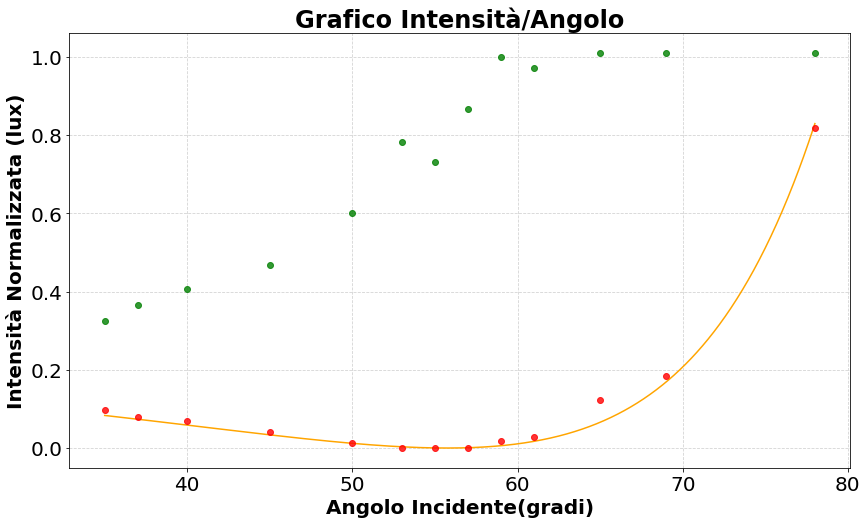

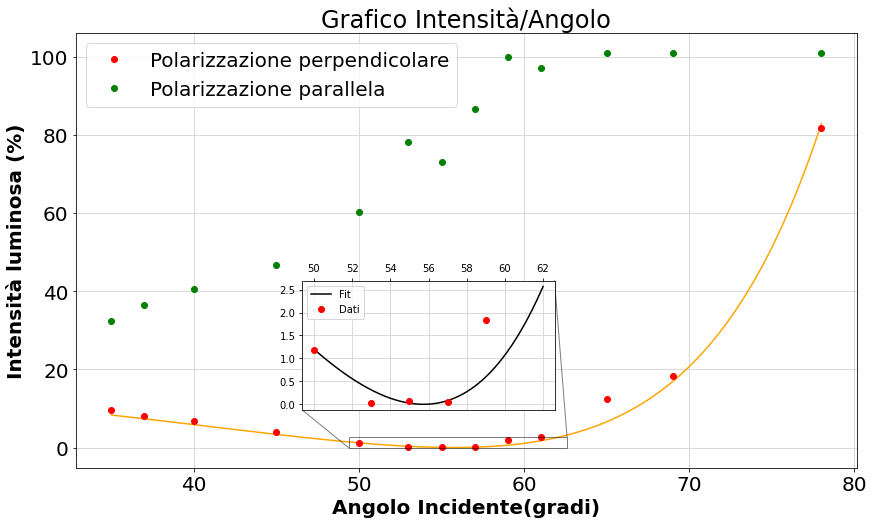

Brewster Angle data range from minimum
53.0
57.0
Brewster Angle Simulated data mean from minimum
55.0
Brewster Angle Simulated data error from minimum
1.9999999999999998
Refraction Index from minimum
1.4281480067421144
Refraction Index error from minimum
0.06085777383386561
Brewster Angle Simulated from maximum mean
55.0
Brewster Angle Simulated from maximum error
1.9999999999999998
Refraction Index from maximum
1.4281480067421144
Refraction Index error from maximum
0.06085777383386561
Index rifr from fit perpendicular
[6.48212965]
[1.44717851]
Brewster Angle from fit perpendicular
[81.2301001]
[1.92750039]


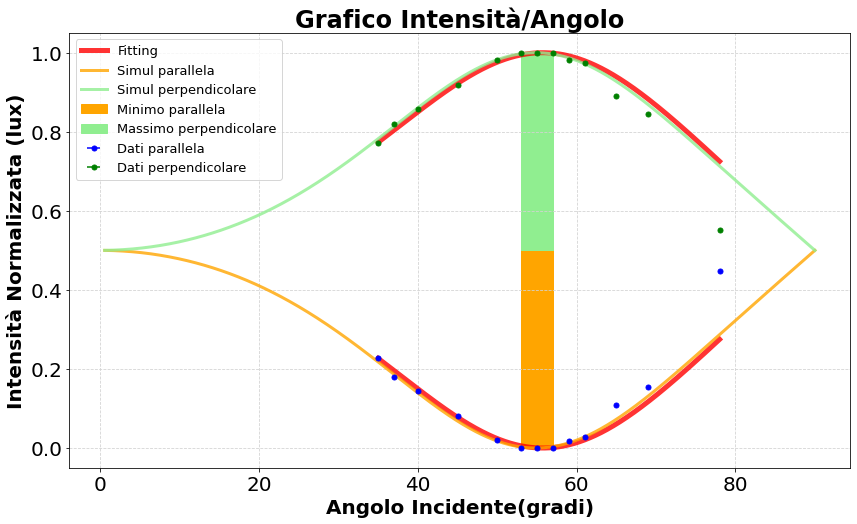

In [30]:
#ANALISI

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#indice di rifrazione simulato
n = 1.42
#Brewster angle simulato
theta = 56.34177390487406

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting1(thetai, indexrifr, I0):
  return I0*(np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

#simulation
thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2

Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot


min = np.argmin(Isimulated)
max = np.argmax(Isimulated2)

#print simulation result
print('Brewster Angle Simulated = minimum parallel')
print(thetai[min]*360/2/np.pi)
print('Brewster Angle Simulated = maximum perpendicular')
print(thetai[max]*360/2/np.pi)
print('Refraction index simulated')
print(np.tan(thetai[min]))

#input data
Idata1 = Idata = np.array([0.9,0.5,0.1,0.5,3.8,30.5,2.1,3.5,4.1,6.9,8.4,0.,0.1])/100
Idata12 = Idata2 = np.array([10.6,16.8,30.1,42.8,67.2,101.1,14.4,14.1,10.3,13.9,12.8,5.9,11.1])/100

#Idata1 = Idata = np.array([81.9,18.4,2.7,0.87,0.573,0.114,15.6,1.18,4.1,6.82])
Idata1 = Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,12.3])/100
#Idata12 = Idata2 = np.array([101.1,101.1,97.3,59.6,40.9,27.8,22.75,60.2,46.8,40.7])
Idata12 = Idata2 = np.array([101.1,101.1,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,101.1])/100

Idatatot = Idata+Idata2

Angle = np.array([12,21,29,40,49,60,70,40,45,50])
Angle = 90-np.array([12,21,29,40,45,50,53,55,35,37,33,31,25])
#Angle = np.array([46.,51.,56.,61.,66.,76.,41.,36.,31.,26.,21.,58.5,53.5])
Angle = Angle/180*np.pi

#fitting

popt, pcov = scipy.optimize.curve_fit(fitting1, Angle, Idata1, p0 = np.array([n,100]))
indexrifr_err,I0_err = np.sqrt(np.diag(pcov))
indexrifr,I0 = popt

#print fitting result
print('Index rifr from fit')
print(indexrifr)
print(indexrifr_err)
print('Brewster Angle from fit')
print(np.arctan(indexrifr)*180/np.pi)
print(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)
print('Index I0 from fit')
print(I0)
print(I0_err)

x = np.linspace(np.min(Angle),np.max(Angle),1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit1 = Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)
yperpendicular = Idatafitperpendicular/(Idatafit+Idatafitperpendicular)

fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
#plt.ylim(0,20)
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità Normalizzata (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,Idatafit1*I0, color = 'orange')
plt.errorbar(Angle*180/np.pi,Idata,color='red', label='Fitting',fmt='o', linewidth=5, alpha=0.8)
plt.errorbar(Angle*180/np.pi,Idata2,color='green', label='Fitting',fmt='o', linewidth=5, alpha=0.8)





#graphs with zoom

fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
#ax.set_xticks(np.arange(min(Angletot),max(Angletot)*1.5, 10)
plt.title("Grafico Intensità/Angolo")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità luminosa (%)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)

plt.errorbar(Angle*180/np.pi,Idata*100,color='red', label='Polarizzazione perpendicolare',fmt='o')
plt.errorbar(Angle*180/np.pi,Idata2*100,color='green', label='Polarizzazione parallela',fmt='o')
plt.plot(x*180/np.pi,Idatafit1*I0*100, color = 'orange')
plt.legend(loc="best")

X_detail = np.linspace(50, 62, 1000)
X_detail = X_detail/180*np.pi
x1 = np.arcsin(np.sin(X_detail)/indexrifr)
Y_detail = Idatafit = simulation(X_detail,x1)
# location for the zoomed portion 
sub_axes = plt.axes([.35, .225, .25, .225]) 
sub_axes.xaxis.tick_top()
sub_axes.tick_params(axis='both', which='major', labelsize=10)
plt.errorbar((90-np.array([35,37,33,31,40])),np.array([0.073,0.022,0.0452,1.84,1.18]),color='red', label='Dati',fmt='o')
sub_axes.plot(X_detail*180/np.pi,Y_detail*I0*100, color="black",label="Fit")
# plot the zoomed portion
sub_axes.grid(color='lightgray',linestyle="-",zorder=0)
sub_axes.legend(loc="upper left",prop={'size': 10})
ax.indicate_inset_zoom(sub_axes, edgecolor="black")
plt.show()
#fig.savefig(f'GraficoMthetaParte3.pdf',dpi = 300)

Idata = Idata/Idatatot
Idata2 = Idata2/Idatatot

#print data result
minimum = findMinWithRange(Angle,Idata,0.01)
maximum = findMaxWithRange(Angle,Idata2,0.01)

print('Brewster Angle data range from minimum')
print(Angle[minimum[0]]*180/np.pi)
print(Angle[minimum[1]]*180/np.pi)

print('Brewster Angle Simulated data mean from minimum')
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated data error from minimum')
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-Angle[minimum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from minimum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from minimum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

print('Brewster Angle Simulated from maximum mean')
BrewsterDataAngle = (Angle[maximum[0]]+Angle[maximum[1]])*90/np.pi
print(BrewsterDataAngle)
print('Brewster Angle Simulated from maximum error')
BrewsterDataAngleErr = np.abs(Angle[maximum[0]]-Angle[maximum[1]])*90/np.pi
print(BrewsterDataAngleErr)
print('Refraction Index from maximum')
print(np.tan(BrewsterDataAngle/180*np.pi))
print('Refraction Index error from maximum')
print(1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi)

#fitting


popt, pcov = scipy.optimize.curve_fit(fittingPerpendicular, Angle, Idata12, p0 = np.array([n]))
indexrifr_errPerp = np.sqrt(np.diag(pcov))
indexrifrPerp = popt

#print fitting result
print('Index rifr from fit perpendicular')
print(indexrifrPerp)
print(indexrifr_errPerp)
print('Brewster Angle from fit perpendicular')
print(np.arctan(indexrifrPerp)*180/np.pi)
print(1/(1+indexrifrPerp**2)*indexrifr_errPerp*180/np.pi)

xPerp = np.linspace(np.min(Angle),np.max(Angle),1000)
x1Perp = np.arcsin(np.sin(xPerp)/indexrifrPerp)
IdatafitPerp = simulation(xPerp,x1Perp)
IdatafitperpendicularPerp = simulationPerpendicular(xPerp,x1Perp)
yPerp = IdatafitPerp/(IdatafitPerp+IdatafitperpendicularPerp)
yperpendicularPerp = IdatafitperpendicularPerp/(IdatafitPerp+IdatafitperpendicularPerp)

#graph
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico Intensità/Angolo",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Intensità Normalizzata (lux)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='red', label='Fitting', linewidth=5, alpha=0.8)
plt.plot(x*180/np.pi,yperpendicular,color='red', linewidth=5, alpha=0.8)

#plt.plot(xPerp*180/np.pi,yPerp,color='darkred', label='Fitting Perp', linewidth=5, alpha=0.8)
#plt.plot(xPerp*180/np.pi,yperpendicularPerp,color='darkred', linewidth=5, alpha=0.8)

plt.plot(thetai*360/np.pi/2,Isimulated, zorder=5, color = "orange", label = "Simul parallela", linewidth=3, alpha=0.8)
plt.plot(thetai*360/np.pi/2,Isimulated2, zorder=5, color = "lightgreen", label = "Simul perpendicolare", linewidth=3, alpha=0.8)

plt.errorbar(Angle*360/np.pi/2,Idata,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "blue", label = "Dati parallela")
plt.errorbar(Angle*360/np.pi/2,Idata2,xerr=(0.5/180*np.pi), fmt='o', markersize = 5, zorder=5, color = "green", label = "Dati perpendicolare")
#plt.errorbar(thetai*360/np.pi/2,Itot, fmt='o', markersize = 5, zorder=5, color = "red", label = "Simulated set")
#plt.axvspan(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi, alpha=0.5,color='orange',label='Minimum')
plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi,Angle[minimum[1]]*180/np.pi,100),np.zeros(100),np.ones(100)*0.5,color='orange',label='Minimo parallela')
plt.fill_between(np.linspace(Angle[maximum[0]]*180/np.pi,Angle[maximum[1]]*180/np.pi,100),np.ones(100),np.ones(100)*0.5,color='lightgreen',label='Massimo perpendicolare')
#plt.plot(thetai*360/np.pi/2,Isimulated, color="red",zorder=1, label = "Simulated Curve")
#plt.plot(IFit,xFit, color="orange",zorder=1, label = "Simulated Fit")
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'GraficoMIParte1.pdf',dpi = 300)

